In [56]:

import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting



In [4]:
p25 = pd.read_csv('C:/Users/yz2991/Desktop/25_Porfolio.csv')
ff3 = pd.read_csv('C:/Users/yz2991/Desktop/3 factor.csv')

In [7]:
#check the start and end of p25 
print(p25.head())
print(p25.tail())

   Unnamed: 0  SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ME2 BM1  \
0      192607      3.7782  -0.4119  -1.9434   0.3530      2.0534   2.1904   
1      192608     -2.2074  -8.7275   2.4404   0.6086      8.3968   2.1709   
2      192609     -6.2113  -0.2989  -6.1982  -1.6368      0.8649  -1.8550   
3      192610     -8.6241  -3.7532  -5.6719   5.7170     -2.5476  -1.7995   
4      192611      3.4744   6.6476   2.2634  -4.7020      0.5362   2.9051   

   ME2 BM2  ME2 BM3  ME2 BM4    ...     ME4 BM1  ME4 BM2  ME4 BM3  ME4 BM4  \
0   2.4192   0.4926  -1.5770    ...      1.5893   1.5278   1.1869   0.2727   
1  -1.1849   4.0084   0.4643    ...      1.3336   3.8730   2.0059   2.1706   
2  -1.2618   1.0829  -3.0405    ...      1.0923  -0.5250  -1.7314   1.4646   
3  -3.2663  -5.0745  -8.0450    ...     -3.3361  -2.6559  -2.0316  -3.1051   
4  -2.3690   3.0078   4.6649    ...      3.4448   2.3887   3.7403   4.9320   

   ME4 BM5  BIG LoBM  ME5 BM2  ME5 BM3  ME5 BM4  BIG HiBM  
0   2.46

In [8]:
#check the start and end of ff3
print(ff3.head())
print(ff3.tail())

   Unnamed: 0  Mkt-RF   SMB   HML    RF
0      192607    2.96 -2.30 -2.87  0.22
1      192608    2.64 -1.40  4.19  0.25
2      192609    0.36 -1.32  0.01  0.23
3      192610   -3.24  0.04  0.51  0.32
4      192611    2.53 -0.20 -0.35  0.31
      Unnamed: 0  Mkt-RF   SMB   HML    RF
1109      201812   -9.55 -2.58 -1.51  0.19
1110      201901    8.41  3.02 -0.60  0.21
1111      201902    3.40  2.02 -2.84  0.18
1112      201903    1.10 -3.15 -4.07  0.19
1113      201904    3.96 -1.69  1.99  0.21


In [9]:
#updated the field name of Year&month field
p25.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff3.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [10]:
#check the column names
print(ff3.columns)
print(p25.columns)

Index(['YYMM', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')
Index(['YYMM', 'SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM',
       'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1',
       'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2',
       'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3',
       'ME5 BM4', 'BIG HiBM'],
      dtype='object')


In [11]:
#to convert to decile format and get excess returns
ff3.iloc[:,1:ff3.shape[1]] = ff3.iloc[:,1:ff3.shape[1]]/100
p25_excess=(p25.iloc[:,1:p25.shape[1]]/100).sub(ff3.RF,axis=0)

In [12]:
print(p25_excess.head())

   SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1   ME2 BM2  \
0    0.035582 -0.006319 -0.021634  0.001330    0.018334  0.019704  0.021992   
1   -0.024574 -0.089775  0.021904  0.003586    0.081468  0.019209 -0.014349   
2   -0.064413 -0.005289 -0.064282 -0.018668    0.006349 -0.020850 -0.014918   
3   -0.089441 -0.040732 -0.059919  0.053970   -0.028676 -0.021195 -0.035863   
4    0.031644  0.063376  0.019534 -0.050120    0.002262  0.025951 -0.026790   

    ME2 BM3   ME2 BM4   ME2 BM5    ...      ME4 BM1   ME4 BM2   ME4 BM3  \
0  0.002726 -0.017970 -0.005544    ...     0.013693  0.013078  0.009669   
1  0.037584  0.002143  0.059175    ...     0.010836  0.036230  0.017559   
2  0.008529 -0.032705 -0.011701    ...     0.008623 -0.007550 -0.019614   
3 -0.053945 -0.083650 -0.016413    ...    -0.036561 -0.029759 -0.023516   
4  0.026978  0.043549  0.024192    ...     0.031348  0.020787  0.034303   

    ME4 BM4   ME4 BM5  BIG LoBM   ME5 BM2   ME5 BM3   ME5 BM4  BIG HiBM  


In [13]:
#YYMM as timestamp
ff3['YYMM'] = pd.to_datetime(ff3['YYMM'],yearfirst=True, format='%Y%m')
p25_excess['YYMM'] = pd.to_datetime(p25['YYMM'],yearfirst=True, format='%Y%m')

In [14]:
#change timestamps to index and delete unnecessary columns
ff3.index = ff3['YYMM']
p25_excess.index = p25_excess['YYMM']
ff3 = ff3.drop('YYMM', axis = 1)
p25_excess = p25_excess.drop('YYMM', axis = 1)
ff3 = ff3.drop('RF', axis = 1)

In [55]:
#calculate average excess return for the 25 porfolios over the whole history
avg_return = p25_excess.mean(axis = 0)
avg_return = avg_return.as_matrix(columns = None)
avg_return = pd.DataFrame(avg_return.reshape((5,5)))
avg_return.rename(columns = {0:'Market Size 0', 1:'Market Size 1', 2: 'Market Size 2', 3:'Market Size 3',4:'Market Size 4'}, inplace = True) 
avg_return.rename(index = {0:'B/M 0', 1:'B/M 1', 2: 'B/M 2', 3:'B/M 3',4:'B/M 4'}, inplace = True)

print(avg_return)
type(avg_return)


       Market Size 0  Market Size 1  Market Size 2  Market Size 3  \
B/M 0       0.005827       0.006958       0.009895       0.011676   
B/M 1       0.006415       0.009339       0.009817       0.010513   
B/M 2       0.007159       0.009111       0.009241       0.010141   
B/M 3       0.007398       0.007629       0.008582       0.009587   
B/M 4       0.006404       0.006379       0.007056       0.006493   

       Market Size 4  
B/M 0       0.013425  
B/M 1       0.012262  
B/M 2       0.011239  
B/M 3       0.010252  
B/M 4       0.009476  


pandas.core.frame.DataFrame

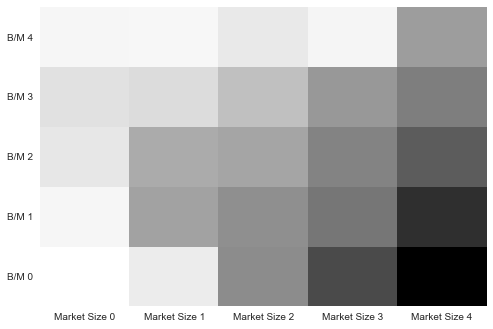

In [58]:
#plot the average excess return of 25 portfolios in a heatmap
plt.pcolor(avg_return)
plt.yticks(np.arange(0.5, len(avg_return.index), 1), avg_return.index)
plt.xticks(np.arange(0.5, len(avg_return.columns), 1), avg_return.columns)
plt.show()

In [59]:
#create class to run OLS for 25 portfolios
class famafrench():
    def __init__(self, y, start = '1963-7-1', end = '1990-12-1'):
        self.start = start
        self.end = end
        self.y = y[start:end]
    
    def __str__(self):
        return 'from %s to %s' %(self.start, self.end)

    def variables(self):
        x = ff3[self.start:self.end]
        y = self.y[self.start:self.end]
        return x, y

    def regression(self):
        x = self.variables()[0]
        x = sm.add_constant(x)
        y = self.variables()[1]
        model = sm.OLS(y,x)
        result = model.fit()

        return result

In [71]:
#get results from OLS
x = famafrench(p25_excess)
res = x.regression()
print(res.params)
print(dir(res))
type(res)
print(res.rsquared)

              0         1         2         3         4         5         6   \
const  -0.003828 -0.000930 -0.000768  0.000871  0.000597 -0.001255  0.000170   
Mkt-RF  1.046603  0.972848  0.938089  0.894567  0.954416  1.098883  1.019992   
SMB     1.388987  1.271877  1.152424  1.097745  1.189345  1.002405  0.940784   
HML    -0.295854  0.078804  0.263227  0.383254  0.620865 -0.481622  0.017782   

              7         8         9     ...           15        16        17  \
const   0.001284  0.001559  0.000638    ...     0.001143 -0.001210 -0.000034   
Mkt-RF  0.971872  0.973286  1.060355    ...     1.062428  1.076970  1.043237   
SMB     0.833638  0.698645  0.849039    ...     0.303937  0.263752  0.244960   
HML     0.237110  0.470338  0.694737    ...    -0.442799  0.017233  0.305987   

              18        19        20        21        22        23        24  
const   0.000631  0.000214  0.001897  0.000063 -0.000320 -0.000729 -0.001759  
Mkt-RF  1.038340  1.148459  0.951570  1.

ValueError: shapes (330,25) and (330,25) not aligned: 25 (dim 1) != 330 (dim 0)